## Sentiment Analysis 

### Using the IMDb review dataset to train a model for sentiment analysis

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

2025-03-25 19:30:50.775726: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 19:30:51.137740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 19:30:51.410259: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742927451.639816    6059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742927451.710936    6059 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742927452.156900    6059 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
datasets, info = tfds.load("imdb_reviews", as_supervised=True, with_info=True)

2025-03-25 19:31:00.646303: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [3]:
from src.review_learn import create_train_test_val, load_glove_embeddings

In [19]:
train_set, test_set, val_set = create_train_test_val(datasets, validation_fraction=0.2)

In [20]:
from src.review_stats import print_stats_of_texts, print_text_stats, TextStatisticUtils

In [21]:
train_set

<_TakeDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [22]:
#from src.lookup_table_creator import LookupTableCreator

In [23]:
#table_creator = LookupTableCreator()

In [24]:
import json
#load lookup table from json
with open("lookup_table.json", "r") as file:
    loaded_dict = json.load(file)
#make string keys to byte strings
lookup_dict_bytes = {key.encode("utf-8"): value for key, value in loaded_dict.items()}

vocabs = tf.constant(list(lookup_dict_bytes.keys()))
values = tf.constant(list(lookup_dict_bytes.values()), dtype= tf.int64)

init = tf.lookup.KeyValueTensorInitializer(vocabs, values)
table = tf.lookup.StaticVocabularyTable(init, num_oov_buckets=1000)

In [25]:
#table = table_creator.create_lookup_table(train_set, 10000, 1000, 32)

In [26]:
#import json 
#lookup_dict = {word.decode('utf-8'): int(value.numpy()) for word, value in zip(table_creator.get_words().numpy(), table_creator.get_word_ids())}
#with open('lookup_table.json', "w") as file:
#    json.dump(lookup_dict, file)

In [27]:
from src.text_preprocessing import ReviewPreprocessor

In [28]:
preprocessor = ReviewPreprocessor(10000, 1000, table, batch_size=32, maxlen=200)

In [29]:
#embeddings = load_glove_embeddings('embeddings/glove.6B.100d.txt', tf.keras.datasets.imdb.get_word_index(), vocab_size=10000, embed_size=128, num_oov_buckets=1000)

In [30]:
train_data, test_data, validation_data = preprocessor.prepare_data_set(train_set), preprocessor.prepare_data_set(test_set), preprocessor.prepare_data_set(val_set)

In [31]:
reviewStats = TextStatisticUtils(train_set=train_set, test_set=test_set, val_set=val_set)

In [32]:
reviewStats.print_all_text_stats()

Statistics of Train Data: 
    | Average text length: 1329.85195 
    | Median text length: 983.0
    | Minimum text length: 53
    | Maximum text length: 13704
     
Statistics of Test Data: 
    | Average text length: 1293.7924 
    | Median text length: 962.0
    | Minimum text length: 32
    | Maximum text length: 12988
     
Statistics of Validation Data: 
    | Average text length: 1305.9404 
    | Median text length: 962.0
    | Minimum text length: 52
    | Maximum text length: 10363
     


In [33]:
for x_batch, y_batch in train_data.take(1):
    print(f"{x_batch.shape}")

(32, 200)


2025-03-25 19:32:37.004058: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [1]:
# Attention Layer Definition
from tensorflow import keras
from keras.saving import register_keras_serializable

@register_keras_serializable(package="CustomLayers")
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def call(self, inputs):
        # Energie-Werte berechnen (Dot-Produkt der Inputs mit sich selbst)
        score = tf.matmul(inputs, inputs, transpose_b=True)
        
        # Softmax über die Scores zur Normalisierung
        attention_weights = tf.nn.softmax(score, axis=-1)
        
        # Kontextvektor als gewichtete Summe der Eingaben
        context_vector = tf.matmul(attention_weights, inputs)
        
        return context_vector
   
    def get_config(self):
        config = super().get_config()  # Hole die Basiskonfiguration
        return config

    @classmethod
    def from_config(cls, config):
        return cls(**config)
    

2025-03-25 20:40:51.094664: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 20:40:51.099640: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-25 20:40:51.113994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742931651.138145   10443 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742931651.145354   10443 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742931651.164281   10443 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

NameError: name 'tf' is not defined

In [47]:
from tensorflow.keras.regularizers import l2


def build_model(n_hidden=2, embed_size=128, vocab_size=10000, num_oov_buckets=1000, dropout_rate=0.3, embedding_matrix=None):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(input_dim=vocab_size + num_oov_buckets, output_dim=embed_size))
    # 1D Convolutional Layer (Extrahiert lokale Merkmale)
    model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation="relu", padding="same"))
    ##model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
    for hidden in range(n_hidden):
        model.add(
            tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, return_sequences=True, dropout=dropout_rate)))
    #model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)))
    
    # Attention Layer
    model.add(Attention())
    model.add(tf.keras.layers.GlobalAveragePooling1D())
    
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00025),
                  metrics=["accuracy"])
    return model

In [48]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2)

In [49]:
model = build_model(n_hidden=1, vocab_size=10000, num_oov_buckets=1000, embed_size=128, dropout_rate=0.6)

In [50]:
history = model.fit(train_data, validation_data=validation_data, epochs=15, callbacks=[tf.keras.callbacks.ModelCheckpoint('Sentiment-M6.keras', save_best_only=True), 
                                                                                      tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
                                                                                lr_scheduler])

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 110s 166ms/step - accuracy: 0.5056 - loss: 1.2381 - val_accuracy: 0.7112 - val_loss: 0.6773 - learning_rate: 2.5000e-04
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.7759 - loss: 0.5008 - val_accuracy: 0.8558 - val_loss: 0.3577 - learning_rate: 2.5000e-04
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 111s 177ms/step - accuracy: 0.9002 - loss: 0.2742 - val_accuracy: 0.8586 - val_loss: 0.3738 - learning_rate: 2.5000e-04
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 123s 196ms/step - accuracy: 0.9305 - loss: 0.2083 - val_accuracy: 0.8494 - val_loss: 0.3944 - learning_rate: 2.5000e-04
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 169ms/step - accuracy: 0.9507 - loss: 0.1556 - val_accuracy: 0.8506 - val_loss: 0.4567 - learning_rate: 1.2500e-04


In [51]:
import matplotlib.pyplot as plt

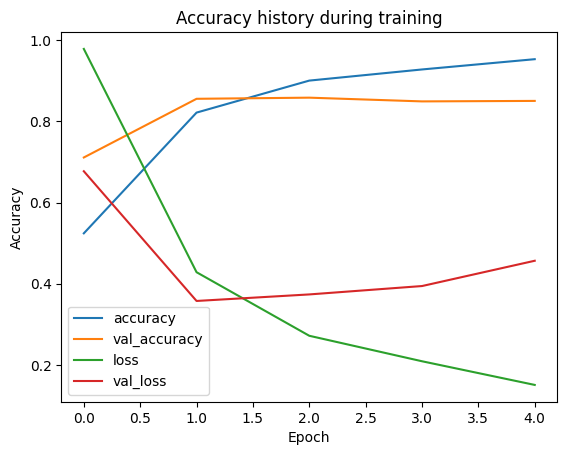

In [52]:
accuracy, val_accuracy, loss, val_loss = history.history["accuracy"], history.history["val_accuracy"], history.history["loss"], history.history["val_loss"]
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label="val_accuracy")
plt.plot(loss, label="loss")
plt.plot(val_loss, label="val_loss")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy history during training')
plt.show()

In [53]:
model.evaluate(test_data)    

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8526 - loss: 0.3660


[0.3621274530887604, 0.8522400259971619]

## 

In [85]:
review = tf.data.Dataset.from_tensor_slices((["What a good movie"], [0]))

In [86]:
from src.review_learn import preprocess
review = preprocessor.prepare_data_set(review)

In [87]:
review

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.int32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [96]:
model = tf.keras.models.load_model('models/Sentiment-M6.keras', custom_objects={'Attention': Attention})

TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, None], 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_3'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Embedding', 'config': {'name': 'embedding_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'input_dim': 11000, 'output_dim': 128, 'embeddings_initializer': {'module': 'keras.initializers', 'class_name': 'RandomUniform', 'config': {'seed': None, 'minval': -0.05, 'maxval': 0.05}, 'registered_name': None}, 'embeddings_regularizer': None, 'activity_regularizer': None, 'embeddings_constraint': None, 'mask_zero': False}, 'registered_name': None, 'build_config': {'input_shape': [None, None]}}, {'module': 'keras.layers', 'class_name': 'Conv1D', 'config': {'name': 'conv1d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'filters': 64, 'kernel_size': [5], 'strides': [1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, 128]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling1D', 'config': {'name': 'max_pooling1d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'pool_size': [2], 'padding': 'valid', 'strides': [2], 'data_format': 'channels_last'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Bidirectional', 'config': {'name': 'bidirectional_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'merge_mode': 'concat', 'layer': {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'forward_gru_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'zero_output_for_mask': True, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 127197064928992}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None, 'shared_object_id': 127197064933936}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 127197064928608}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.6, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, 64]}}, 'backward_layer': {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'backward_gru_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'return_sequences': True, 'return_state': False, 'go_backwards': True, 'stateful': False, 'unroll': False, 'zero_output_for_mask': True, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 127197033984224}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'seed': None, 'gain': 1.0}, 'registered_name': None, 'shared_object_id': 127197064130256}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 127197064133520}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.6, 'recurrent_dropout': 0.0, 'reset_after': True, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, None, 64]}}}, 'registered_name': None, 'build_config': {'input_shape': [None, None, 64]}}, {'module': None, 'class_name': 'Attention', 'config': {'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}}, 'registered_name': 'Attention', 'build_config': {'input_shape': [None, None, 256]}}, {'module': 'keras.layers', 'class_name': 'GlobalAveragePooling1D', 'config': {'name': 'global_average_pooling1d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'data_format': 'channels_last', 'keepdims': False}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_4', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'rate': 0.6, 'seed': None, 'noise_shape': None}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_6', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'units': 64, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 0.01}, 'registered_name': None}, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'rate': 0.6, 'seed': None, 'noise_shape': None}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_7', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}, 'units': 1, 'activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 64]}}], 'build_input_shape': [None, None]}, 'registered_name': None, 'build_config': {'input_shape': [None, None]}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 0.0002500000118743628, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': 'binary_crossentropy', 'loss_weights': None, 'metrics': ['accuracy'], 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': False}}.

Exception encountered: <class '__main__.Attention'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': None, 'class_name': 'Attention', 'config': {'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 127197606766416}}, 'registered_name': 'Attention', 'build_config': {'input_shape': [None, None, 256]}}.

Exception encountered: Error when deserializing class 'Attention' using config={'trainable': True, 'dtype': 'float32'}.

Exception encountered: Attention.__init__() got an unexpected keyword argument 'trainable'